# Observables y medidas
# SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.
1. Calcular la probabilidad de encontrarlo en una posición en particular.

In [49]:
import numpy as np
class QuantumSystem:
    def __init__(self, num_positions, ket_state):
        self.num_positions = num_positions
        self.ket_state = ket_state

    def calculate_probability(self, position):
        if position < 0 or position >= self.num_positions:
            raise ValueError("Position out of range")
        amplitude = self.ket_state[position]
        norm=np.linalg.norm(self.ket_state)
        probability =  (abs(amplitude)/norm)**2
        return probability

# Example 
num_positions = 4
key_state=[-3-1j,-2j,+1j,2]
#ket_state = [(0.5+0j), 0, (0.3+0.1j), 0, (0.2-0.2j)] 
system = QuantumSystem(num_positions, key_state)
desired_position = 2
probability = system.calculate_probability(desired_position)
print(f"The probability of finding the particle at position {desired_position} is: {probability}")


The probability of finding the particle at position 2 is: 0.05263157894736841


2. Buscar la probabilidad de transitar del primer vector al segundo.

In [58]:
import numpy as np

def probability_transition(ket1, ket2):
    inner_product = np.dot(ket1, ket2)  # Calcular el producto interno
    probability = np.abs(inner_product) ** 2  # Calcular el módulo al cuadrado
    return probability

# Ejemplo de uso
ket1 = np.array([-1j,1])  # Primer ket de ejemplo
ket2 = np.array([1,-1j])  # Segundo ket de ejemplo

probability = probability_transition(ket1, ket2)
print(f"La probabilidad de transitar del primer ket {ket1} al segundo {ket2} es:", probability)


La probabilidad de transitar del primer ket [-0.-1.j  1.+0.j] al segundo [ 1.+0.j -0.-1.j] es: 4.0


Recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [56]:
import numpy as np

def probability_transition(initial_state, final_state):
    inner_product = np.vdot(final_state, initial_state)
    probability = abs(inner_product) ** 2
    return probability

# Ejemplo de uso    
initial_state = np.array([1/np.sqrt(2), 0, 1/np.sqrt(2)])
final_state = np.array([0, 1/np.sqrt(2), 1/np.sqrt(2)]) 

probability = probability_transition(initial_state, final_state)
print("La probabilidad de transitar del estado inicial al estado final es:", probability)


La probabilidad de transitar del estado inicial al estado final es: 0.2499999999999999


Con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [2]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def media_varianza_observable(matriz_observable, vector_ket):
    if not es_hermitiana(matriz_observable):
        print("La matriz no es hermitiana.")
        return None, None

    media = np.dot(vector_ket.conj().T, np.dot(matriz_observable, vector_ket)).real

    varianza = np.dot(vector_ket.conj().T, np.dot(matriz_observable ** 2, vector_ket)).real - media ** 2

    return media, varianza

# Ejemplo de uso
matriz_observable = np.array([[1, 0], [0, -1]])  
vector_ket = np.array([[1], [0]])                

media, varianza = media_varianza_observable(matriz_observable, vector_ket)

if media is not None and varianza is not None:
    print("Media del observable:", media)
    print("Varianza del observable:", varianza)


Media del observable: [[1]]
Varianza del observable: [[0]]


El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.



Eigenvalues: [ 0.70710678 -0.70710678]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
La probabilidad de pasar al vector propio 1 es de: 0.5
La probabilidad de pasar al vector propio 1 es de: 0.5


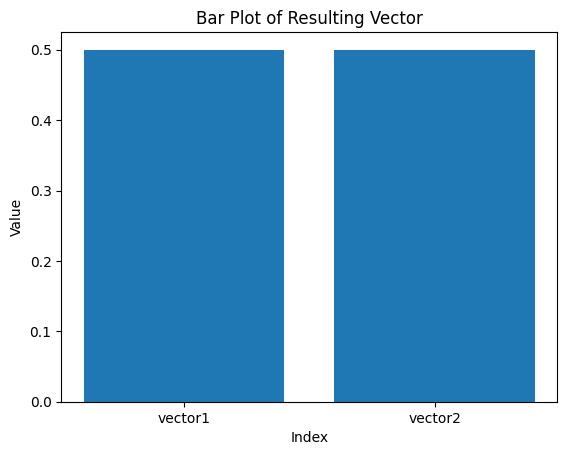

In [29]:
import numpy as np
def normalize(vector):
    norma = np.linalg.norm(vector)
    normal = vector / norma
    return normal
def eigen(matriz):
    eigenvalues, eigenvectors = np.linalg.eig(observable)
    print("Eigenvalues:", eigenvalues)
    print("Eigenvectors:\n", eigenvectors)
    return eigenvectors
    

#Ejercicio 4.3.1
observable = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])
ket=np.array([1, 0])
ket_normal = normalize(ket)
eigenvectors = eigen(observable)
p1 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvectors[0]))**2, 2)
p2 = np.round(np.linalg.norm(np.vdot(ket_normal, eigenvectors[1]))**2, 2)
print("La probabilidad de pasar al vector propio 1 es de:", p1)
print("La probabilidad de pasar al vector propio 1 es de:", p2)

#Ejercicio 4.3.2
import matplotlib.pyplot as plt
probFinal=[p1,p2]
indices = ["vector1", "vector2"]
plt.bar(indices, probFinal)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Resulting Vector')
plt.show()

In [21]:
import numpy as np

# Definir la matriz Sx
Sx = (1/np.sqrt(2)) * np.array([[0, 1], [1, 0]])

# Encontrar los vectores propios y valores propios de Sx
eigenvalues, eigenvectors = np.linalg.eig(Sx)

print("Valores propios de Sx:")
print(eigenvalues)

print("\nVectores propios de Sx:")
print(eigenvectors)

# Definir el estado inicial |psi>
psi_initial = np.array([1, 0])  # Por ejemplo, estado inicial spin up

# Calcular las probabilidades de transición a cada vector propio
transition_probabilities = []
for eigenvector in eigenvectors.T:
    transition_probability = np.abs(np.vdot(eigenvector, psi_initial))**2
    transition_probabilities.append(transition_probability)

# Imprimir las probabilidades de transición
print("\nProbabilidades de transición a cada vector propio:")
for i, probability in enumerate(transition_probabilities):
    print(f"Probabilidad de transición al vector propio {i+1}: {probability}")


Valores propios de Sx:
[ 0.70710678 -0.70710678]

Vectores propios de Sx:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Probabilidades de transición a cada vector propio:
Probabilidad de transición al vector propio 1: 0.4999999999999999
Probabilidad de transición al vector propio 2: 0.4999999999999999


Con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [20]:
import numpy as np
matz=[]
def def_Mat(new_mat,matz):
    matz.append(new_mat)
    return matz
#Ejemplo
matz=def_Mat(np.array([[1, 0], [0, 1]]),matz)
matz=def_Mat(np.array([[0, -1j], [1j, 0]]),matz)
matz=def_Mat(np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]]),matz)

def cal_final(matz):
    psi_final=np.array([1,0])
    for rep in range(len(matz)):
        psi_final=np.dot(matz[rep],psi_final)
    return psi_final
print("Estado final:")
print(cal_final(matz))


Estado final:
[0.+0.70710678j 0.-0.70710678j]


In [37]:
#Ejercicio 4.4.1
U1=np.array([[0,1],[1,0]])
is_unitary = np.allclose(np.dot(U1, U1.conj().T), np.eye(2))
print("La matriz U1 es unitaria es",is_unitary)
U2=np.array([[np.sqrt(2)/2,np.sqrt(2)/2],[np.sqrt(2)/2,-np.sqrt(2)/2]])
is_unitary = np.allclose(np.dot(U2, U2.conj().T), np.eye(2))
print("La matriz U2 es unitaria es",is_unitary)


La matriz U1 es unitaria es True
La matriz U2 es unitaria es True


In [53]:
#Ejercicio 4.4.2
import numpy as np
import matplotlib.pyplot as plt

# Define two 3x3 complex matrices
ma1 = np.array([[0,1/np.sqrt(2),1/np.sqrt(2),0],
                [1j/np.sqrt(2),0,0,1/np.sqrt(2)],
                [1/np.sqrt(2),0,0,1j/np.sqrt(2)],
                [0,1/np.sqrt(2),-1/np.sqrt(2),0]])

ma2 = np.array([[1], [0], [0], [0]])
#print("Input: ", ma1,ma2)

# Multiplying a 3x3 matrix by a 3x1 vector
x2 = np.dot(ma1, ma2)
x3=np.dot(ma1,x2)
x4=np.dot(ma1,x3)
print("Result after 3 moments ", x4)

print("La probabilidad de que la bola se encuentre en el punto 3 es de:",abs(x4[2]))



Result after 3 moments  [[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
La probabilidad de que la bola se encuentre en el punto 3 es de: [0.]
